In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
olx_it_df = pd.read_csv('olxit.csv')
olx_economy_df = pd.read_csv('olxeconomy.csv')
olx_gastronomy_df = pd.read_csv('olxgastronomy.csv')
olx_cashier_df = pd.read_csv('olxcashier.csv')
olx_warehouse_df = pd.read_csv('olxwarehouse.csv')

In [ ]:
olx_it_df['section'] = 'informatyka'
olx_economy_df['section'] = 'finanse-ksiegowosc'
olx_gastronomy_df['section'] = 'gastronomia'
olx_cashier_df['section'] = 'kasjer-ekspedient'
olx_warehouse_df['section'] = 'magazynier'
olx_df = pd.concat([olx_it_df,olx_economy_df,olx_gastronomy_df,olx_cashier_df,olx_warehouse_df])

In [4]:
olx_df.head()

,title,city,added,offer_id,working_hours,type_of_contract,salary,number_of_views,section
0,Zdobądź pracę grafika i specjalisty IT - bezpł...,Olsztyn,14 lutego 2018,413117703,Pełny etat,Inny,,609,informatyka
1,Developer C# (.NET),Oświęcim,15 lutego 2018,415507275,Pełny etat,Umowa o pracę,,33,informatyka
2,Technik / Instalator / Monter sieci radiowych ...,Gdynia,15 lutego 2018,410603797,Pełny etat,Umowa zlecenie,2 700 - 3 400 zł/mies.,378,informatyka
3,Programista php/Node.js,Wrocław,15 lutego 2018,414806667,Pełny etat,Umowa o pracę,,92,informatyka
4,Opiekun produktu,Rzeszów,15 lutego 2018,415500217,Pełny etat,Umowa o pracę,3 000 - 5 000 zł/mies.,107,informatyka


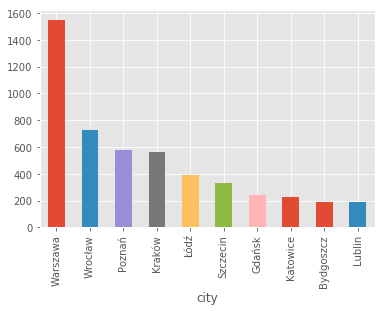

In [25]:
olx_df.groupby('city')['title'].count().sort_values(ascending = False).head(10).plot.bar()

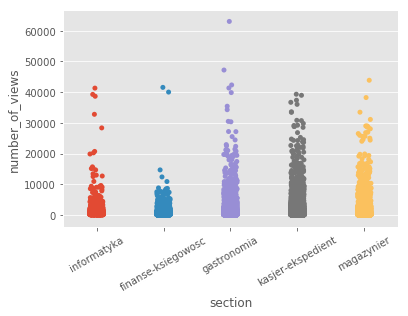

In [6]:
section_views = sns.stripplot(x = 'section', y = 'number_of_views', data = olx_df, jitter = True)
section_views.set_xticklabels(labels = olx_df['section'].unique(),rotation=30)
section_views

In [8]:
olx_df['city'].nunique()

1125

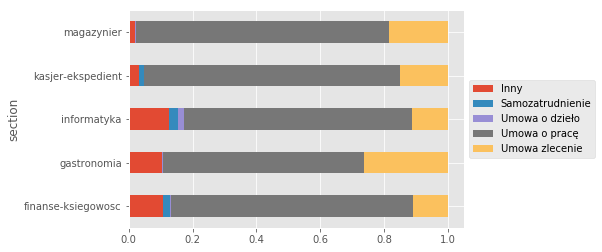

In [24]:
contracts_by_section = olx_df.groupby(['section','type_of_contract']).size().unstack().fillna(0)
percentge_contracts_by_section = contracts_by_section.div(contracts_by_section.sum(1),axis = 0)
percentge_contracts_by_section.plot(kind = 'barh', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))